In [1]:
from main import *

## Gun Modelv2 non sym

OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,100_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_5_POD_13_1e-6/Data/
Opening files from this path =  OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,100_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_5_POD_13_1e-6/Data/
6
R [-5.26182102e-05 -1.30599480e-06 -1.41388406e-06] [[-9.99999916e-01  4.00216696e-04  8.99089414e-05]
 [ 7.68003703e-05 -3.26340429e-02  9.99467365e-01]
 [-4.02937619e-04 -9.99467288e-01 -3.26340095e-02]] 1
Rtilde [0.00387664 0.00053125 0.00060949] [[ 9.99999827e-01  4.50498131e-04  3.78130903e-04]
 [ 3.80375933e-04 -4.99382113e-03 -9.99987458e-01]
 [ 4.48604163e-04 -9.99987429e-01  4.99399163e-03]] 1
I [2.98843172e-04 1.49709674e-05 1.10290102e-05] [[ 9.99999734e-01  5.62387614e-04 -4.64509357e-04]
 [ 5.55536343e-04 -9.99892965e-01 -1.46202081e-02]
 [ 4.72681862e-04 -1.46199462e-02  9.99893011e-01]] 1
7
R [-7.17107612e-05 -1.78478139e-06 -1.93348627e-06] [[-9.99999917e-01  4.01348615e-04  6.34193288e-05]
 [ 5.06135003e-05 -3.18269541e

/Users/paulledger/Coding/Rodrigues_angles/Rodrigues_Angles/src/Fmeasure.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  Fexactconst[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.abs(normalisation)
/Users/paulledger/Coding/Rodrigues_angles/Rodrigues_Angles/src/Commeasure.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  Comexactconst[n] = np.abs(np.linalg.norm(Z,ord='fro')**2 ) / np.abs(normalisation)


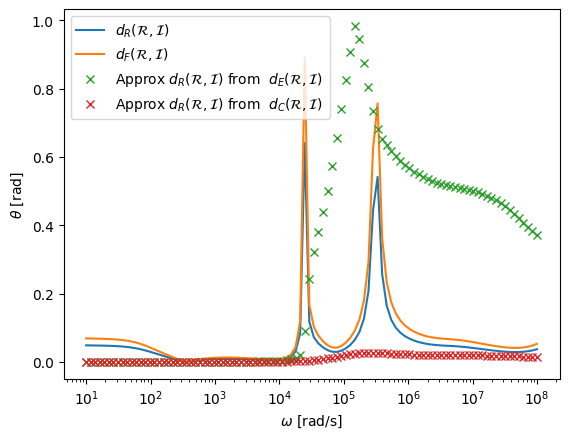

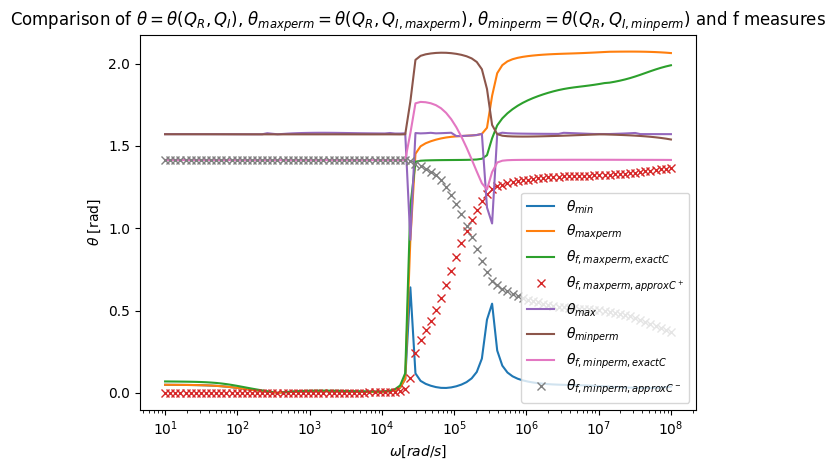

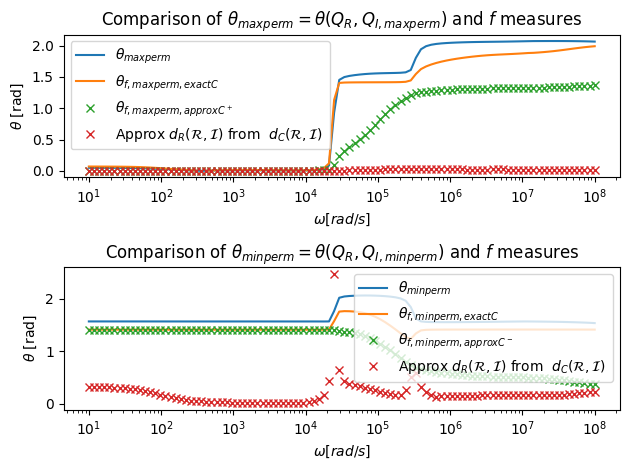

6 1.0
[0.00053125 0.00060949 0.00387664] [1.10290102e-05 2.98843172e-04 1.49709674e-05]
[[-4.50498131e-04  3.78130903e-04  9.99999827e-01]
 [ 4.99382113e-03 -9.99987458e-01  3.80375933e-04]
 [ 9.99987429e-01  4.99399163e-03  4.48604163e-04]] [[-4.64509357e-04  9.99999734e-01 -5.62387614e-04]
 [-1.46202081e-02  5.55536343e-04  9.99892965e-01]
 [ 9.99893011e-01  4.72681862e-04  1.46199462e-02]]
0.019615044606619367 1.5710677724779105
0.02773986210923435 2.000271427261491
7 1.0
[0.00385755 0.00053077 0.00060897] [1.75142770e-05 1.28791621e-05 3.47075937e-04]
[[ 9.99999826e-01  4.50754120e-04  3.80186740e-04]
 [ 3.82427240e-04 -4.98093570e-03 -9.99987522e-01]
 [ 4.48854810e-04 -9.99987493e-01  4.98110722e-03]] [[-5.79301175e-04  4.65536904e-04  9.99999724e-01]
 [ 9.99891101e-01  1.47464982e-02  5.72373208e-04]
 [ 1.47462277e-02 -9.99891156e-01  4.74028871e-04]]
0.01972859029537793 1.571083679490012
0.0279004399622257 2.000287332051234
Computing F measure Tilde


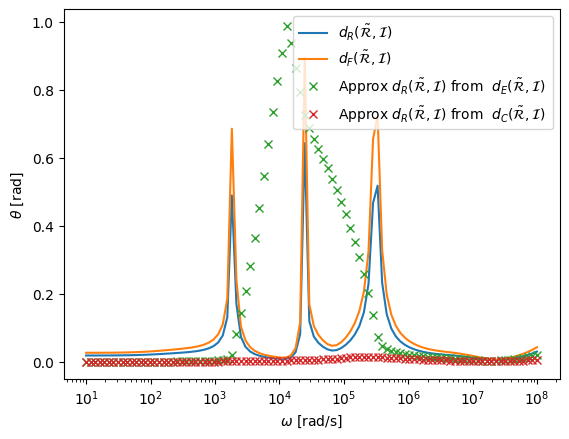

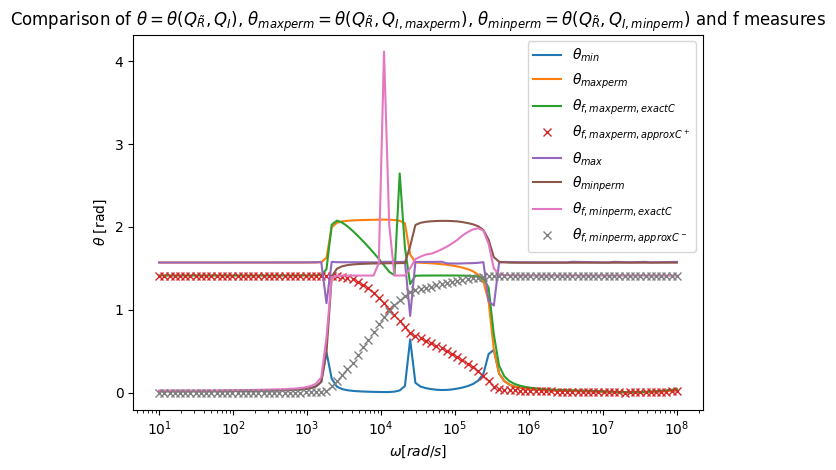

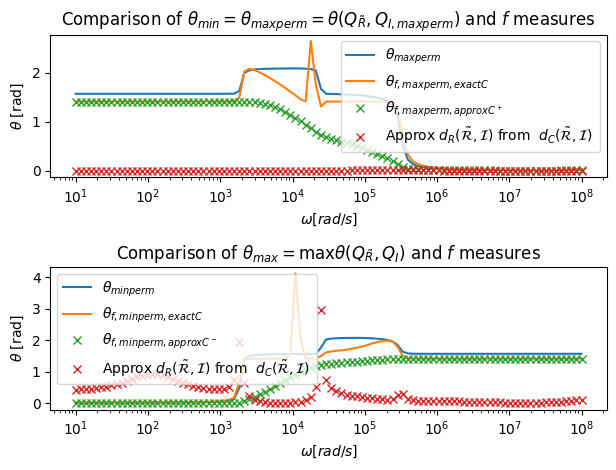

6 1.0
[0.0006109  0.00392926 0.00053256] [2.98843172e-04 1.49709674e-05 1.10290102e-05]
[[-3.71062828e-04  9.99999830e-01  4.49787510e-04]
 [ 9.99987270e-01  3.73321435e-04 -5.03185884e-03]
 [-5.03202590e-03  4.47914649e-04 -9.99987239e-01]] [[-9.99999734e-01 -5.62387614e-04  4.64509357e-04]
 [-5.55536343e-04  9.99892965e-01  1.46202081e-02]
 [-4.72681862e-04  1.46199462e-02 -9.99893011e-01]]
0.01965314416239042 1.5710752027802557
0.027793743017726167 2.000278856541502
7 1.0
[0.0006109  0.00392926 0.00053256] [3.47075937e-04 1.75142770e-05 1.28791621e-05]
[[ 3.71062828e-04  9.99999830e-01  4.49787510e-04]
 [-9.99987270e-01  3.73321435e-04 -5.03185884e-03]
 [ 5.03202590e-03  4.47914649e-04 -9.99987239e-01]] [[ 9.99999724e-01 -5.79301175e-04  4.65536904e-04]
 [ 5.72373208e-04  9.99891101e-01  1.47464982e-02]
 [ 4.74028871e-04  1.47462277e-02 -9.99891156e-01]]
0.019779599599950865 1.5710932915791063
0.027972578012559965 2.000296942736098


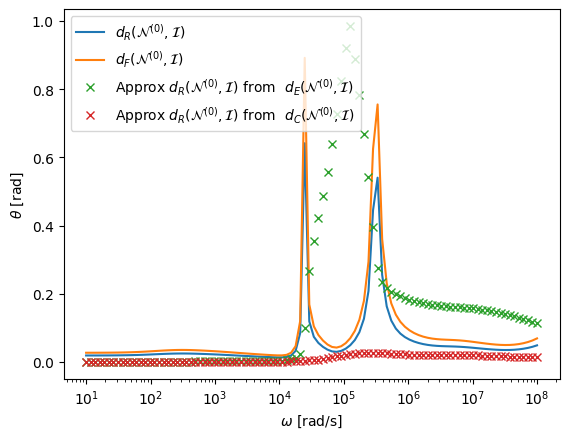

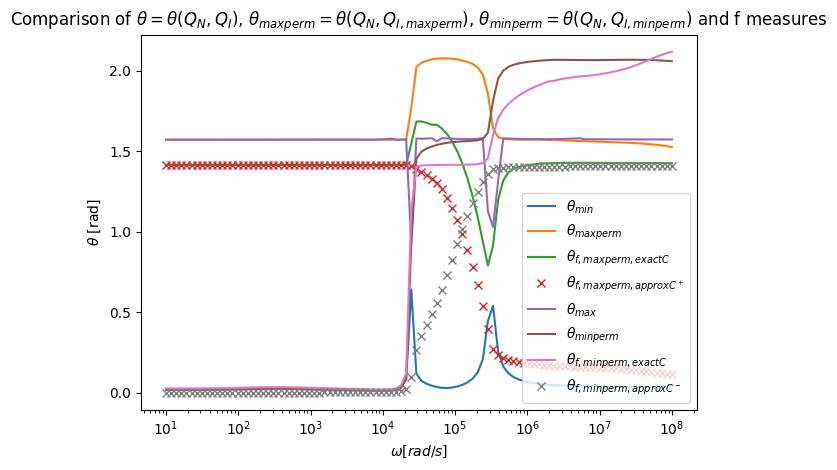

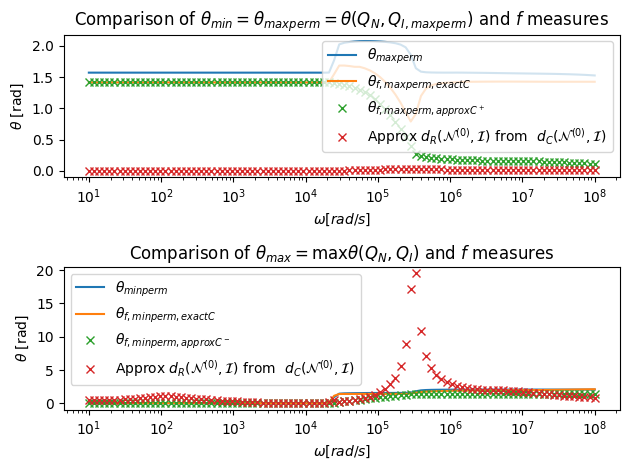

In [18]:

#DirList=["OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,20_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_4_POD_13_1e-6/Data/"]
#    "OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,20_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_4_POD_13_1e-6/Data/"]
#DirList=["OCC_Gun_modelv2_nonsym_al/al_0.01_mu_1,1_sig_3.5e7,3.5e7/1e1-1e8_40_el_26657_ord_2_POD_13_1e-6/Data/"]

SaveRIList=[]
SaveRtilde=[]

MaxOmega=1e8
p=5
mu=100

directory="OCC_Gun_modelv2_nonsym_StainSt/al_0.01_mu_1,"+str(mu)+"_sig_1.45e6,4.5e6/1e1-1e8_100_el_26657_ord_"+str(p)+"_POD_13_1e-6/Data/"
print(directory)
RIResults,RtildeIResults, N0IResults=main(directory,MaxOmega,Figures="On")    
SaveRIList=[]
SaveRtilde=[]



dict_keys(['Frequencies', 'MinAnglestoreRI', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRIfmeasapprxconstsortedmindiff_min', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_min', 'AnglestoreRIfmeasapprxconstsortedmindiff_max', 'dFMinAnglestoreRI', 'dFMaxAnglestoreRI', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRIcommeasapprxconstsortedmindiff_min', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_min', 'AnglestoreRIcommeasapprxconstsortedmindiff_max'])


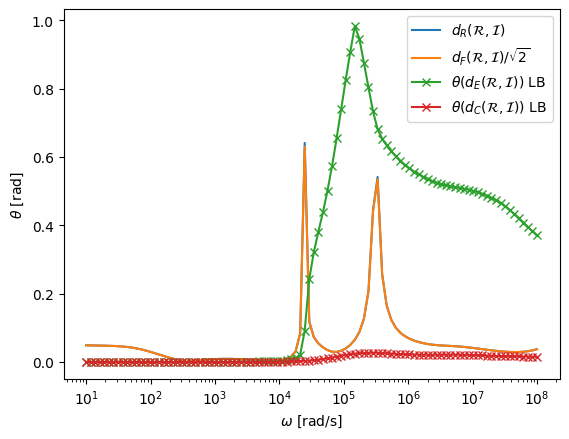

In [19]:
print(RIResults.keys())

Frequencies=RIResults["Frequencies"]
MinAnglestoreRI=RIResults["MinAnglestoreRI"]
AnglestoreRIfmeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIcommeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])

#AnglestoreRIfmeasupper=np.fmax(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"])
#AnglestoreRIfmeaslower=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"])

#AnglestoreRIfmeasupper=np.fmax(AnglestoreRIfmeasupper,RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
#AnglestoreRIfmeaslower=np.fmin(AnglestoreRIfmeaslower,np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"]))
#AnglestoreRIfmeasavg=(AnglestoreRIfmeasupper+AnglestoreRIfmeaslower)/2

#AnglestoreRIcommmupper=np.fmax(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"])
#AnglestoreRIcommmlower=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"])
#AnglestoreRIcommmavg = (AnglestoreRIcommmupper+AnglestoreRIcommmlower )/2

#AnglestoreRIcommmupper=np.fmax(AnglestoreRIcommmupper,RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
#AnglestoreRIcommmlower=np.fmin(AnglestoreRIcommmlower,RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
#AnglestoreRIcommmavg = (AnglestoreRIcommmupper+AnglestoreRIcommmlower )/2



dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRI,label=r'$d_R({\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRI/np.sqrt(2),label=r'$d_F({\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRIfmeasapprxconstsortedmaxdiff_max,'-x',label=r'$\theta(d_E({\cal R},{\cal I}))$ LB')

plt.semilogx(Frequencies,AnglestoreRIcommeasapprxconstsortedmaxdiff_max,'-x',label=r'$\theta(d_C({\cal R},{\cal I}))$ LB')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_RI_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

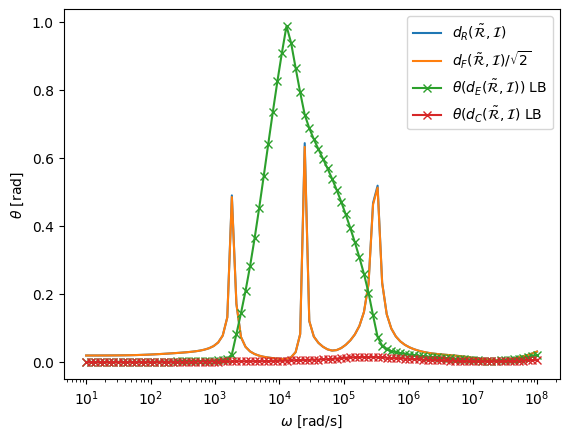

In [20]:

Frequencies=RtildeIResults["Frequencies"]
MinAnglestoreRtildeI=RtildeIResults["MinAnglestoreRtildeI"]
AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max=RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"]
dFMinAnglestoreRtildeI = RtildeIResults["dFMinAnglestoreRtildeI"]
AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
#AnglestoreRtildeIfmeasupper=np.fmax(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
#AnglestoreRtildeIfmeaslower=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])

#AnglestoreRtildeIfmeasupper=np.fmax(AnglestoreRtildeIfmeasupper,RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min"])
#AnglestoreRtildeIfmeaslower=np.fmin(AnglestoreRtildeIfmeaslower,RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min"])

#AnglestoreRtildeIfmeasavg=(AnglestoreRtildeIfmeasupper+AnglestoreRtildeIfmeaslower)/2

#AnglestoreRtildeIfmeasfullconstsortedmindiff= RtildeIResults["AnglestoreRtildeIfmeasfullconstsortedmindiff"]

#AnglestoreRtildeIcommmupper=np.fmax(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min"])
#AnglestoreRtildeIcommmlower=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min"])

#AnglestoreRtildeIcommmupper=np.fmax(AnglestoreRtildeIcommmupper,RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])
#AnglestoreRtildeIcommmlower=np.fmin(AnglestoreRtildeIcommmlower,RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])


#AnglestoreRtildeIcommmavg = (AnglestoreRtildeIcommmupper+AnglestoreRtildeIcommmlower )/2

AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])

fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRtildeI,label=r'$d_R(\tilde{\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRtildeI/np.sqrt(2),label=r'$d_F(\tilde{\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max,'-x',label=r'$\theta(d_E(\tilde{\cal R},{\cal I}))$ LB')
plt.semilogx(Frequencies,AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max,'-x',label=r'$\theta(d_C(\tilde{\cal R},{\cal I})$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.2)
plt.legend()
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_RtildeI_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")
plt.show()

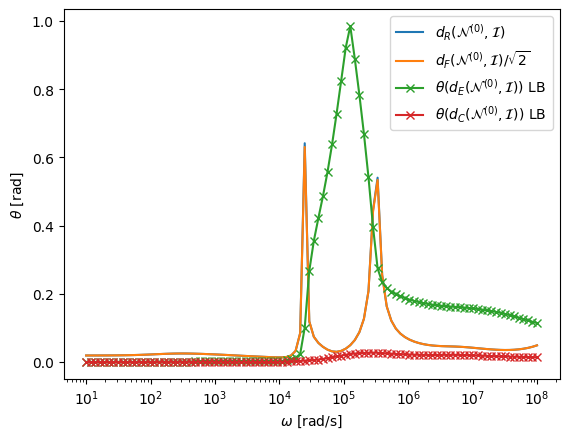

In [21]:

Frequencies=N0IResults["Frequencies"]
MinAnglestoreN0I=N0IResults["MinAnglestoreN0I"]
AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max=np.fmin(N0IResults["AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Ifmeasapprxconstsortedmindiff_min"])
AnglestoreN0Icommeasapprxconstsortedmaxdiff_max=np.fmin(N0IResults["AnglestoreN0Icommeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Icommeasapprxconstsortedmindiff_min"])

dFMinAnglestoreN0I = N0IResults["dFMinAnglestoreN0I"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreN0I,label=r'$d_R({\cal N}^{(0)},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreN0I/np.sqrt(2),label=r'$d_F({\cal N}^{(0)},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max,'x-',label=r'$\theta(d_E({\cal N}^{(0)},{\cal I}))$ LB')
plt.semilogx(Frequencies,AnglestoreN0Icommeasapprxconstsortedmaxdiff_max,'x-',label=r'$\theta(d_C({\cal N}^{(0)},{\cal I}))$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.2)
plt.savefig("OCC_Gun_modelv2_nonsym_StainSt_N0I_al_0.01_"+str(mu)+",1_sig_1e6,1e8_ord_"+str(p)+".pdf")

plt.legend()
plt.show()